In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import plotly.graph_objects as go
import plotly.express as px
import collections.abc
collections.Iterable = collections.abc.Iterable
from astrodendro import Dendrogram
from astrodendro import structure
import pandas as pd

In [2]:
cgs_mp = 9.10938291e-28
cgs_me = 9.10938291e-28 
cgs_xmh =  cgs_mp + cgs_me
yHe = 9.7222222e-2 
mu = (1.e0+4.e0*yHe)*cgs_xmh

In [3]:
def get_data(filename):
  d = {}
  with h5py.File(filename, "r") as data:
    data_list = list(data)
    for ls in data_list:
      d[ls] = data[ls][()]
  return d

In [4]:
d = get_data('C:/Users/kotor/StarGen/datasets/data_ppp/cb2800.h5')

hx = d['space1']
hy = d['space2']
hz = d['space3']

nH = d['nH']
rho = nH*mu

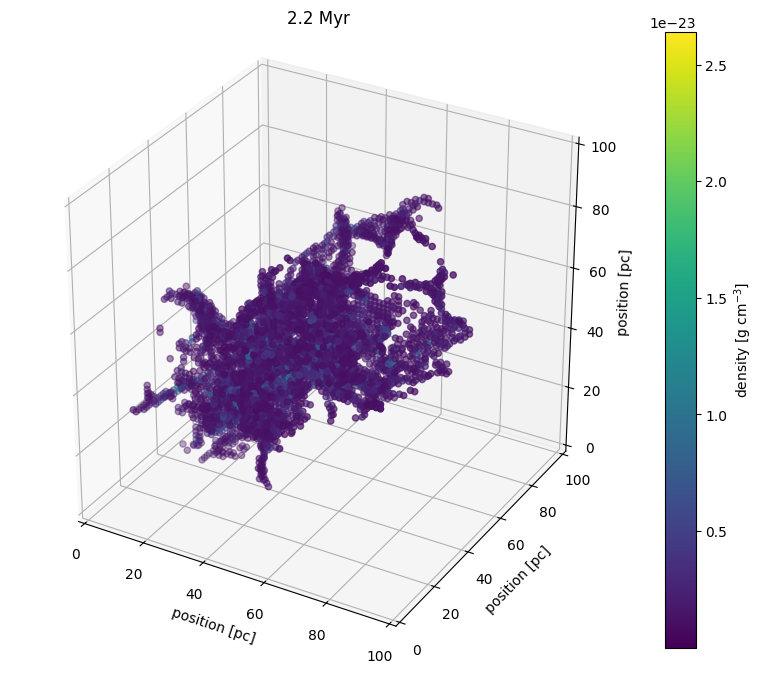

In [5]:
# make 3D map

shape = rho.shape
gas_density = rho.reshape(-1)
colormap = plt.get_cmap('viridis')
norm = plt.Normalize(gas_density.min(), gas_density.max())

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')
ax.set_box_aspect((1,1,1))

x_coords = np.repeat(np.arange(shape[0]), shape[1]*shape[2]) * hx
y_coords = np.tile(np.repeat(np.arange(shape[1]), shape[2]), shape[0]) * hy
z_coords = np.tile(np.arange(shape[2]), shape[0]*shape[1]) * hz

threshold = 1 * 10**-24
mask= gas_density > threshold

x_filtered = x_coords[mask]
y_filtered = y_coords[mask]
z_filtered = z_coords[mask]
gas_mass_filtered = gas_density[mask]

scatter = ax.scatter(x_filtered, y_filtered, z_filtered, c=gas_mass_filtered, cmap=colormap, norm=norm)  

cbar = plt.colorbar(scatter, ax=ax, orientation='vertical')
cbar.set_label('density [g cm$^{-3}$]')

ax.set_xlim3d(0, 100)
ax.set_ylim3d(0, 100)
ax.set_zlim3d(0, 100)

plt.title("2.2 Myr")

X = ax.set_xlabel('position [pc]')
Y = ax.set_ylabel('position [pc]')
Z = ax.set_zlabel('position [pc]')

#plt.savefig("3Dmap_400")

In [6]:
dendro = Dendrogram.compute(rho, min_value=2*10**-24, min_delta=1*10**-24, min_npix=20)

In [7]:
leaf_indices = [i for i, structure in enumerate(dendro.all_structures) if structure.is_leaf]
branch_indices = [j for j, structure in enumerate(dendro.all_structures) if structure.is_branch]

print(leaf_indices)
print(branch_indices)
print(len(leaf_indices))
print(len(branch_indices))

[0, 1, 2, 5, 7, 9, 13, 17, 18, 19, 21, 23, 24, 25, 26, 27, 29, 30, 31, 33, 34, 35]
[3, 4, 6, 8, 10, 11, 12, 14, 15, 16, 20, 22, 28, 32]
22
14


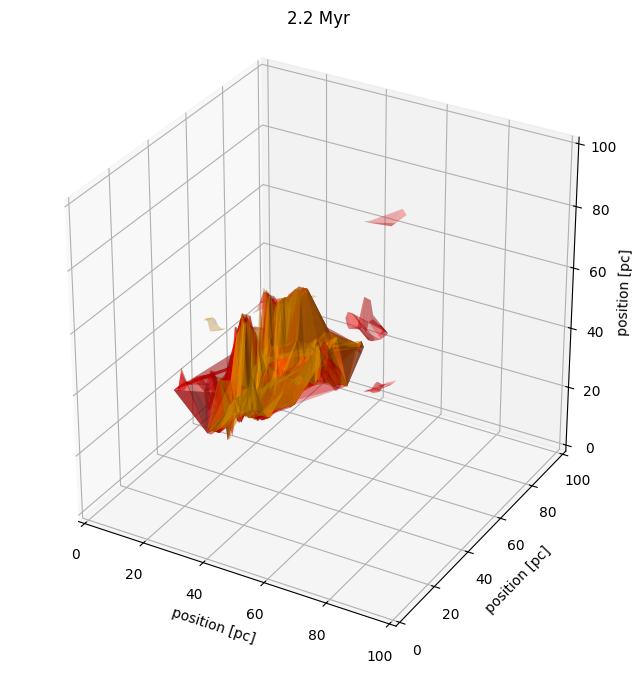

In [8]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.set_box_aspect((1,1,1))

for i, structure_index in enumerate(leaf_indices):
    structure = dendro[structure_index]
    mask = structure.get_mask()
    indices = np.where(mask)
    ax.plot_trisurf(indices[0] * hx, indices[1] * hy, indices[2] * hz, color='red', alpha=0.3)
    
for j, structure_index in enumerate(branch_indices):
    structure = dendro[structure_index]
    mask = structure.get_mask()
    indices = np.where(mask)
    ax.plot_trisurf(indices[0] * hx, indices[1] * hy, indices[2] * hz, color='orange', alpha=0.3)

ax.set_xlim3d(0, 100)
ax.set_ylim3d(0, 100)
ax.set_zlim3d(0, 100)

plt.title("2.2 Myr")

X = ax.set_xlabel('position [pc]')
Y = ax.set_ylabel('position [pc]')
Z = ax.set_zlabel('position [pc]')

#plt.savefig("dendro3D_400_contour")

In [9]:
# make peaks list

x_peak, y_peak, z_peak, peak_value = [], [], [], []
for s in dendro.leaves:
    x_ch, y_ch, z_ch = s.get_peak()[0]
    value = s.get_peak()[1]
    x_peak.append(round(float(x_ch), 6))
    y_peak.append(round(float(y_ch), 6))
    z_peak.append(round(float(z_ch), 6))
    peak_value.append(round(float(value), 30))

x_peak = np.array(x_peak) * hx
y_peak = np.array(y_peak) * hy
z_peak = np.array(z_peak) * hz

peak = pd.DataFrame({'x_peak':x_peak, 'y_peak':y_peak, 'z_peak':z_peak, 'peak_value':peak_value})

display(peak)

,x_peak,y_peak,z_peak,peak_value
0,8.305664,35.991211,26.301270,1.260225e-23
1,13.842773,51.218262,41.528320,8.084790e-24
2,19.379883,48.449707,20.764160,2.641091e-23
3,26.301270,59.523926,37.375488,1.118634e-23
4,20.764160,47.065430,15.227051,7.250390e-24
5,24.916992,49.833984,22.148438,1.599927e-23
6,29.069824,35.991211,23.532715,1.745665e-23
7,27.685547,53.986816,52.602539,2.363033e-23
8,30.454102,47.065430,38.759766,2.325452e-23
9,33.222656,35.991211,30.454102,2.239359e-23


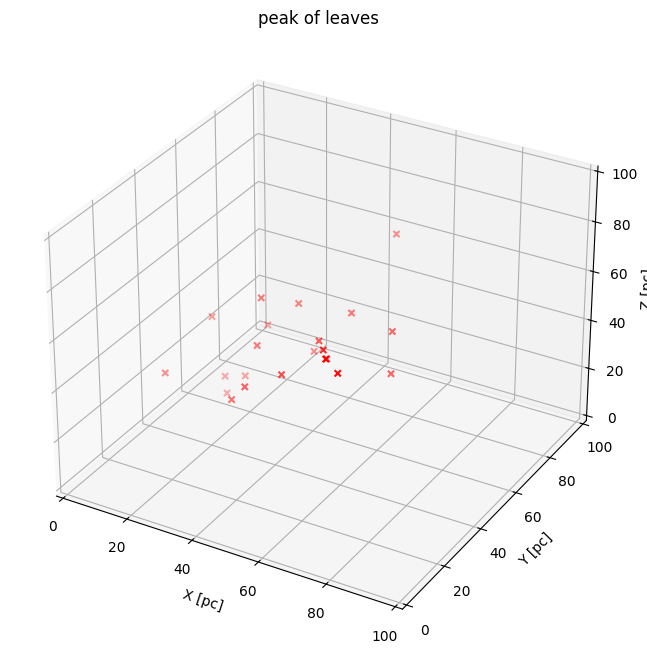

In [10]:
# plot the peaks

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(peak['x_peak'], peak['y_peak'], peak['z_peak'], marker='x', color='red')

ax.set_xlim3d(0, 100)
ax.set_ylim3d(0, 100)
ax.set_zlim3d(0, 100)

plt.title('peak of leaves')

X = ax.set_xlabel('X [pc]')
Y = ax.set_ylabel('Y [pc]')
Z = ax.set_zlabel('Z [pc]')

#plt.savefig('dendro3D_400_peak')

In [11]:
# plot by plotly

fig = px.scatter_3d(peak, x='x_peak', y='y_peak', z='z_peak')

# Leaf structures
for i, leaf_structure_index in enumerate(leaf_indices):
    leaf_structure = dendro[leaf_structure_index]
    leaf_mask = leaf_structure.get_mask()
    leaf_mask_indices = np.where(leaf_mask)
    mesh_leaf = go.Mesh3d(x=leaf_mask_indices[0] * hx, 
                          y=leaf_mask_indices[1] * hy, 
                          z=leaf_mask_indices[2] * hz, 
                          opacity=0.3,
                          color='red',
                          name=f'Leaf {i + 1} - Surface')
    fig.add_trace(mesh_leaf)

# Branch structures
for j, branch_structure_index in enumerate(branch_indices):
    branch_structure = dendro[branch_structure_index]
    branch_mask = branch_structure.get_mask()
    branch_mask_indices = np.where(branch_mask)
    mesh_branch = go.Mesh3d(x=branch_mask_indices[0] * hx, 
                            y=branch_mask_indices[1] * hy, 
                            z=branch_mask_indices[2] * hz,
                            opacity=0.3, 
                            color='orange',
                            name=f'Branch {j + 1} - Surface')
    fig.add_trace(mesh_branch)

fig.update_layout(
    scene=dict(
        xaxis=dict(title='X [pc]', range=[0, 100]),
        yaxis=dict(title='Y [pc]', range=[0, 100]),
        zaxis=dict(title='Z [pc]', range=[0, 100]),
        aspectratio=dict(x=1, y=1, z=1)
    ),
    title='Structure Contours in 3D with Mesh Surface',
    margin=dict(l=0, r=0, b=0, t=40),
    showlegend=True)


In [12]:
leaf_npix, branch_npix = [], []

for structure_index in leaf_indices:
    structure = dendro[structure_index]
    npix = structure.get_npix()
    leaf_npix.append(npix)
    
for structure_index in branch_indices:
    structure = dendro[structure_index]
    npix = structure.get_npix()
    branch_npix.append(npix)

leaf_sizes = [npix * hx * hy * hz for npix in leaf_npix]
branch_sizes = [npix * hx * hy * hz for npix in branch_npix]

print(leaf_sizes)
print(branch_sizes)

[95.49306513508782, 3652.609741417109, 3408.571908294107, 3177.7970008843113, 71.61979885131586, 2039.8379746911814, 1684.3915655772435, 161.80769370112102, 116.71374627621844, 185.68095998489298, 427.06620796525385, 175.07061941432767, 116.71374627621844, 71.61979885131586, 116.71374627621844, 76.92496913659852, 188.3335451275343, 177.723204556969, 55.704287995467894, 153.84993827319704, 82.23013942188118, 82.23013942188118]
[63.66204342339188, 270.5636845494155, 2535.87139636511, 55.704287995467894, 1074.296982769738, 2321.0119998111622, 87.53530970716383, 336.8783131154487, 63.66204342339188, 1546.4571381598944, 53.051702852826566, 82.23013942188118, 68.96721370867454, 55.704287995467894]


In [13]:
# calculate average of size

leaf_size_ave = np.sum(leaf_sizes) / 22
branch_size_ave = np.sum(branch_sizes) / 14

print(leaf_size_ave)
print(branch_size_ave)

741.759263524066
615.3997530927882


In [14]:
# check the density of structures

density_per_leaf, density_per_branch = [], []

for structure_index in leaf_indices:
    structure = dendro[structure_index]
    mask = structure.get_mask()
    indices = np.where(mask)
    leaf_mass = np.sum(rho[indices])
    density_per_leaf.append(leaf_mass)
    
for structure_index in branch_indices:
    structure = dendro[structure_index]
    mask = structure.get_mask()
    indices = np.where(mask)
    branch_mass = np.sum(rho[indices])
    density_per_branch.append(branch_mass)

total_density_leaf = np.sum(density_per_leaf)
total_density_branch = np.sum(density_per_branch)

print(density_per_leaf)
print(total_density_leaf)
print(density_per_branch)
print(total_density_branch)

[1.5783964501486281e-22, 6.4685152859205216e-21, 6.183160651772056e-21, 5.885413586713292e-21, 1.1663727780731847e-22, 4.33000618723441e-21, 3.700565226285191e-21, 3.747557482013577e-22, 3.0477617261642704e-22, 6.649700062361731e-22, 9.291768415242991e-22, 2.2471328486174044e-22, 3.132021446480878e-22, 7.414552142595412e-23, 1.3705072672991792e-22, 1.357472802909844e-22, 4.820409899578557e-22, 2.1157797655546234e-22, 7.045066169935487e-23, 2.364534807986208e-22, 1.409299527245162e-22, 9.352941797016529e-23]
3.1235658066988567e-20
[8.116573082693578e-23, 5.693655136936277e-22, 4.986869483412415e-21, 8.800153213753015e-23, 2.428637700794396e-21, 4.712188052026358e-21, 2.2690980784769773e-22, 1.0321442428344549e-21, 2.0220802227268155e-22, 3.410262683469903e-21, 7.034509502089702e-23, 1.7632539449104005e-22, 1.65621723485084e-22, 8.314801077130577e-23]
1.8233192993084324e-20


In [15]:
# calculate average of density

leaf_density_ave = total_density_leaf / 22
branch_density_ave = total_density_branch / 14

print(leaf_density_ave)
print(branch_density_ave)

1.4198026394085712e-21
1.3023709280774517e-21
